# PCA & Dimension Reduction

### An alternative definition for Principal Component Analysis (PCA)

#### Principal Component Analysis (PCA) allows you to reduce a large number of correlated variables into much fewer synthetic variables. These synthetic variables, which effectively replicate the original data, are referred to as principal components.

![PCA Figure](./images/pca.png)

## Why is Dimension Reduction Useful?

### 1. Visualization 
#### Projecting N dimensions to 2-3 dimensions can easily be plotted
![TSNE Image](./images/tsne.png)

### 2. Reduce space & time complexity
#### Less computation required.  Less features to clean, store, and work with
![Dimension Reduction Image](./images/dimension-reduction-cube.png)

### 3. More interpretable
#### It removes noise, thus providing a simpler explanation, better understanding

### 4. Feature Extraction
#### Identify features that are unimportant and can be dropped altogether
![Feature Importance Heatmap](./images/feature_importance.svg)

### 5. Anomaly Detection
#### Idenitify values that don't belong easily in lower dimensional space
![Anomaly Detection Graph](./images/anomaly-detection.png)
---

---
### Because of it's versatility, Dimensionality Reduction is used in many other fields without the addition of machine learning.

In [33]:
def show_image(i):
    plt.figure(figsize=(8,4));
    plt.subplot(1, 2, 1);
    plt.imshow(mnist.data[i].reshape(28,28),
                  cmap = plt.cm.gray, interpolation='nearest');

In [25]:
def compare_results(i):
    plt.figure(figsize=(8,4));

    # Original
    plt.subplot(1, 2, 1);
    plt.imshow(mnist.data[i].reshape(28,28),
                  cmap = plt.cm.gray, interpolation='nearest');
    plt.xlabel('784 components', fontsize = 14)
    plt.title('Original Image', fontsize = 20);

    # Compressed
    plt.subplot(1, 2, 2);
    plt.imshow(approximation[i].reshape(28, 28),
                  cmap = plt.cm.gray, interpolation='nearest');
    plt.xlabel('332 components', fontsize = 14)
    plt.title('95% of Explained Variance', fontsize = 20);

## Image Compression with PCA

In [3]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
# You can add the parameter data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


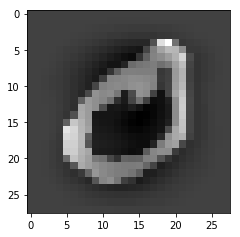

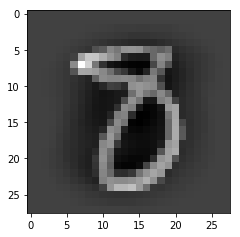

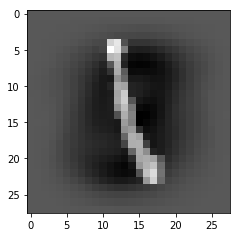

In [38]:
show_image(1)
show_image(50300)
show_image(8000)

In [6]:
# Images
mnist.data.shape

(70000, 784)

In [7]:
# Labels
mnist.target.shape

(70000,)

In [8]:
# Scale the data
scaler = StandardScaler()
mnist.data = scaler.fit_transform(mnist.data)

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Force the PCA to preserve 95% of the variance in our data (max 5% loss)
pca = PCA(.95)

In [10]:
lower_dimensional_data = pca.fit_transform(mnist.data)

In [11]:
pca.n_components_

332

### We reduced our dimensions from 784 to 332 with very little data loss!

In [13]:
# Take the inverse transform to put it back into an image
approximation = pca.inverse_transform(lower_dimensional_data)

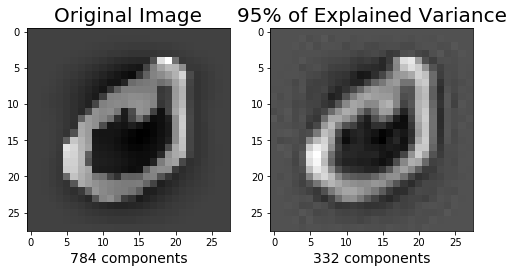

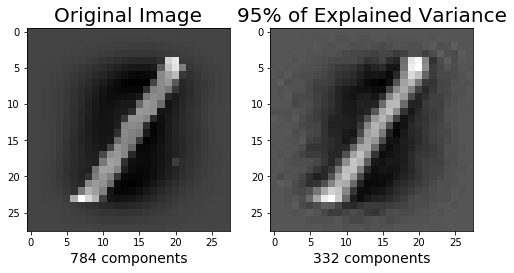

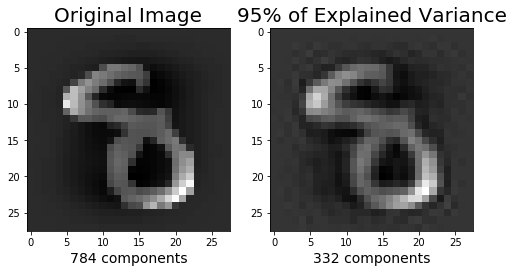

In [28]:
compare_results(1)
compare_results(10000)
compare_results(50000)